## EDA sobre las condiciones de real state en California en 1870's-2010

Importa las librerias necesarias y empieza a revisar el dataframe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/Usuario/Documents/Programación/Python projects/RealState/train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Obtén la estadística básica de todas las columnas

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Determina la correlación entre la columna del precio de venta y otras columnas

In [7]:
correlation_sales = df.corr().loc["SalePrice"]
positive_correlation_sales = correlation_sales[(correlation_sales > 0) & (correlation_sales != 1)]
positive_correlation_sales

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6956\972522169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_sales = df.corr().loc["SalePrice"]


LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
Name: SalePrice, dtype: float64

In [8]:
df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6956\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### Ahora, veremos un mapa de calor para determinar las correlaciones entre columnas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6956\3331758410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matriz = df.corr()


<Axes: >

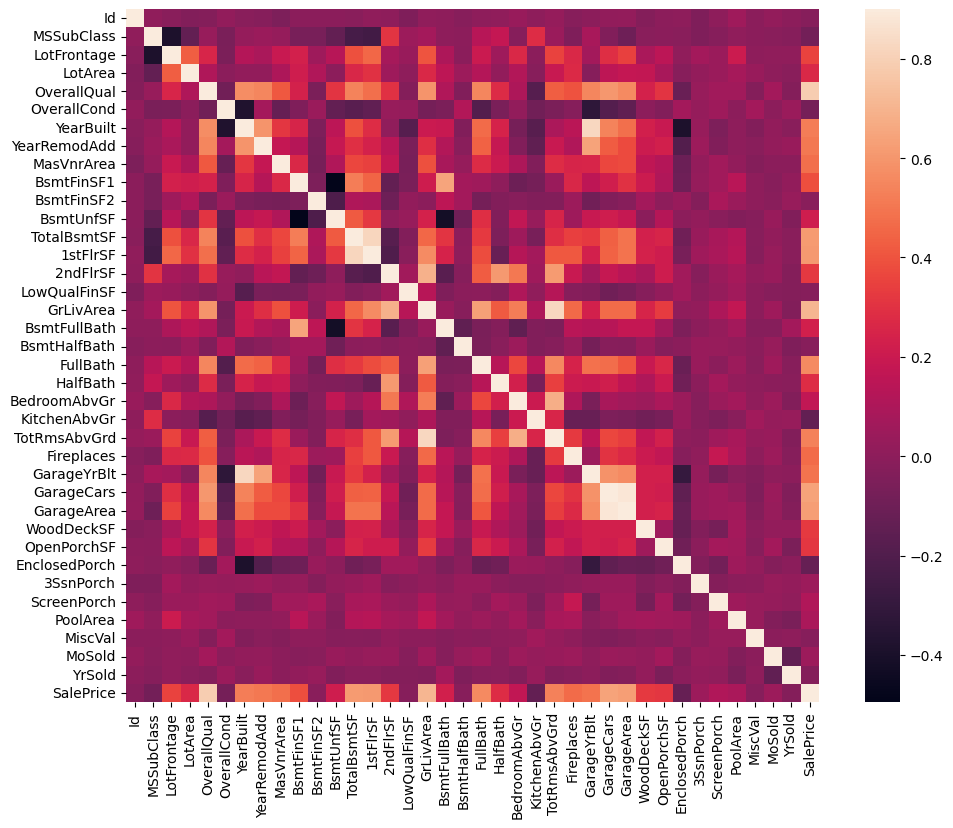

In [9]:
corr_matriz = df.corr() 
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matriz, vmax=0.9, square=True)

## Distribución estadística del precio de las casas en California

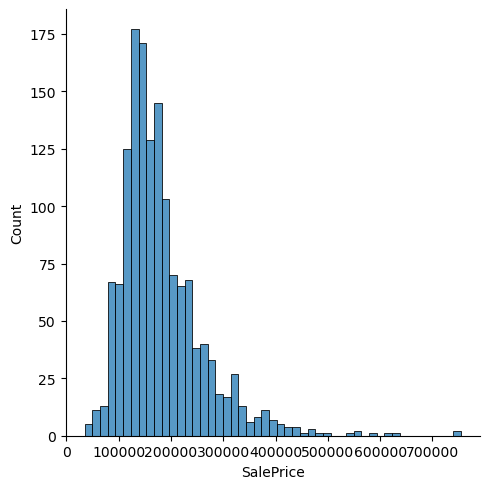

In [10]:
sns.displot(df["SalePrice"])

Ahora, veamos cómo es la correlación de el precio con las 3 variables más relacionadas a dicha columna.

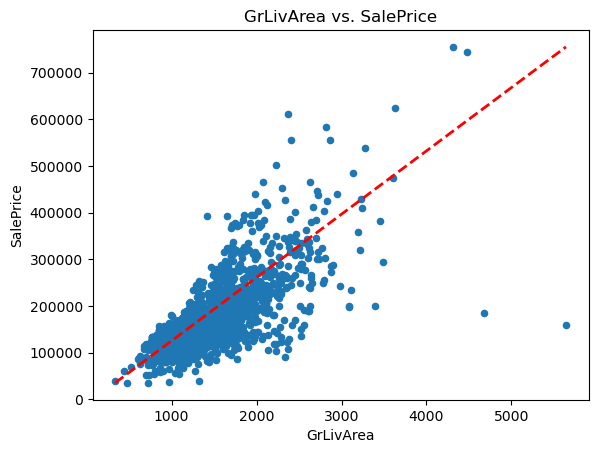

In [11]:
data=pd.concat([df["GrLivArea"], df["SalePrice"]], axis=1)
data.plot.scatter(x="GrLivArea", y="SalePrice")
# Definir los límites del eje Y basados en los valores mínimos y máximos de tus datos
y_min = data['SalePrice'].min()
y_max = data['SalePrice'].max()

# Calcular los valores de inicio y finalización para la línea diagonal
x_min = data['GrLivArea'].min()
x_max = data['GrLivArea'].max()
y_min = data['SalePrice'].min()
y_max = data['SalePrice'].max()

# Trazar la línea diagonal que atraviesa la gráfica de dispersión
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--', linewidth=2)

# Personalizar el gráfico según tus necesidades
plt.title('GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Mostrar el gráfico
plt.show()

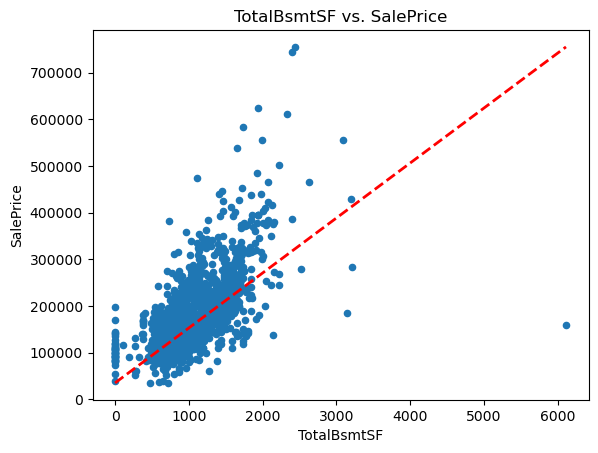

In [12]:
data2=pd.concat([df["TotalBsmtSF"], df["SalePrice"]], axis=1)
data2.plot.scatter(x="TotalBsmtSF", y="SalePrice")
# Definir los límites del eje Y basados en los valores mínimos y máximos de tus datos
y_min = data2['SalePrice'].min()
y_max = data2['SalePrice'].max()

# Calcular los valores de inicio y finalización para la línea diagonal
x_min = data2['TotalBsmtSF'].min()
x_max = data2['TotalBsmtSF'].max()
y_min = data2['SalePrice'].min()
y_max = data2['SalePrice'].max()

# Trazar la línea diagonal que atraviesa la gráfica de dispersión
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--', linewidth=2)

# Personalizar el gráfico según tus necesidades
plt.title('TotalBsmtSF vs. SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

# Mostrar el gráfico
plt.show()

Ahora, analicemos las menos probables dentro de los 4 más probables en tener una relación directa

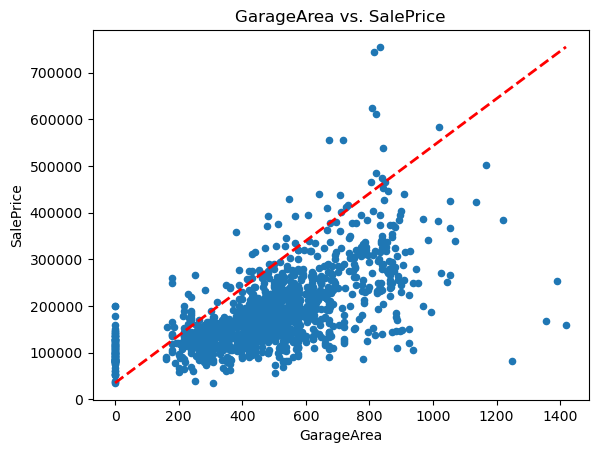

In [13]:
data3 = pd.concat([df["GarageArea"], df["SalePrice"]], axis=1)
data3.plot.scatter(x="GarageArea", y="SalePrice")

# Definir los límites del eje Y basados en los valores mínimos y máximos de tus datos
y_min = data3['SalePrice'].min()
y_max = data3['SalePrice'].max()

# Calcular los valores de inicio y finalización para la línea diagonal
x_min = data3['GarageArea'].min()
x_max = data3['GarageArea'].max()

# Trazar la línea diagonal que atraviesa la gráfica de dispersión
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--', linewidth=2)

# Personalizar el gráfico según tus necesidades
plt.title('GarageArea vs. SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

# Mostrar el gráfico
plt.show()


Como podremos ver, el precio de venta no está tan ligado al garage para los autos, aunque esto puede deberse principalmente a tecnicismo o a que se cuenta con el "Garage Area"

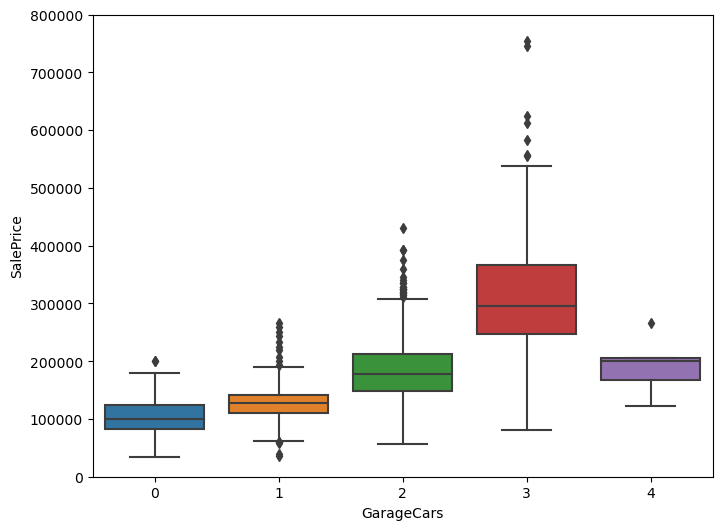

In [14]:
data4 = pd.concat([df["GarageCars"], df["SalePrice"]], axis=1)
# Personalizar el gráfico de bigotes o boxplot
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=data4["GarageCars"],y=data4["SalePrice"], data=data4)
fig.axis(ymin=0, ymax=800000)
# Mostrar el gráfico
plt.show()


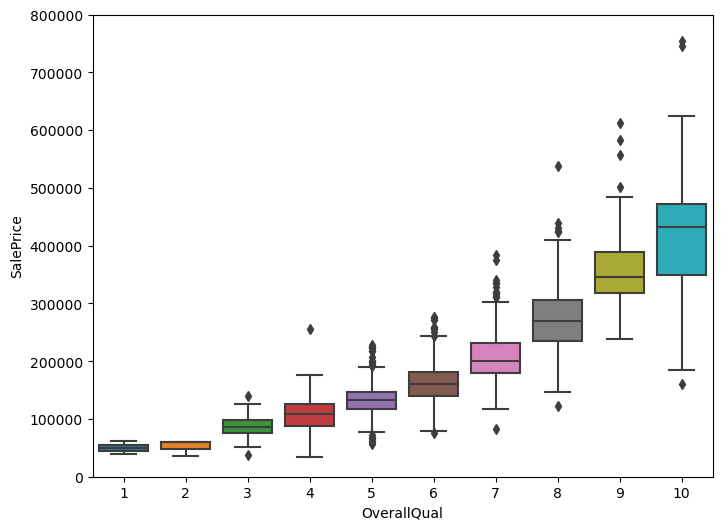

In [15]:
data5 = pd.concat([df["OverallQual"], df["SalePrice"]], axis=1)
# Personalizar el gráfico de bigotes o boxplot
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=data5["OverallQual"],y=data5["SalePrice"], data=data5)
fig.axis(ymin=0, ymax=800000)
# Mostrar el gráfico
plt.show()


Ahora, verifiquemos la relación entre el precio y la edad de las construcciones

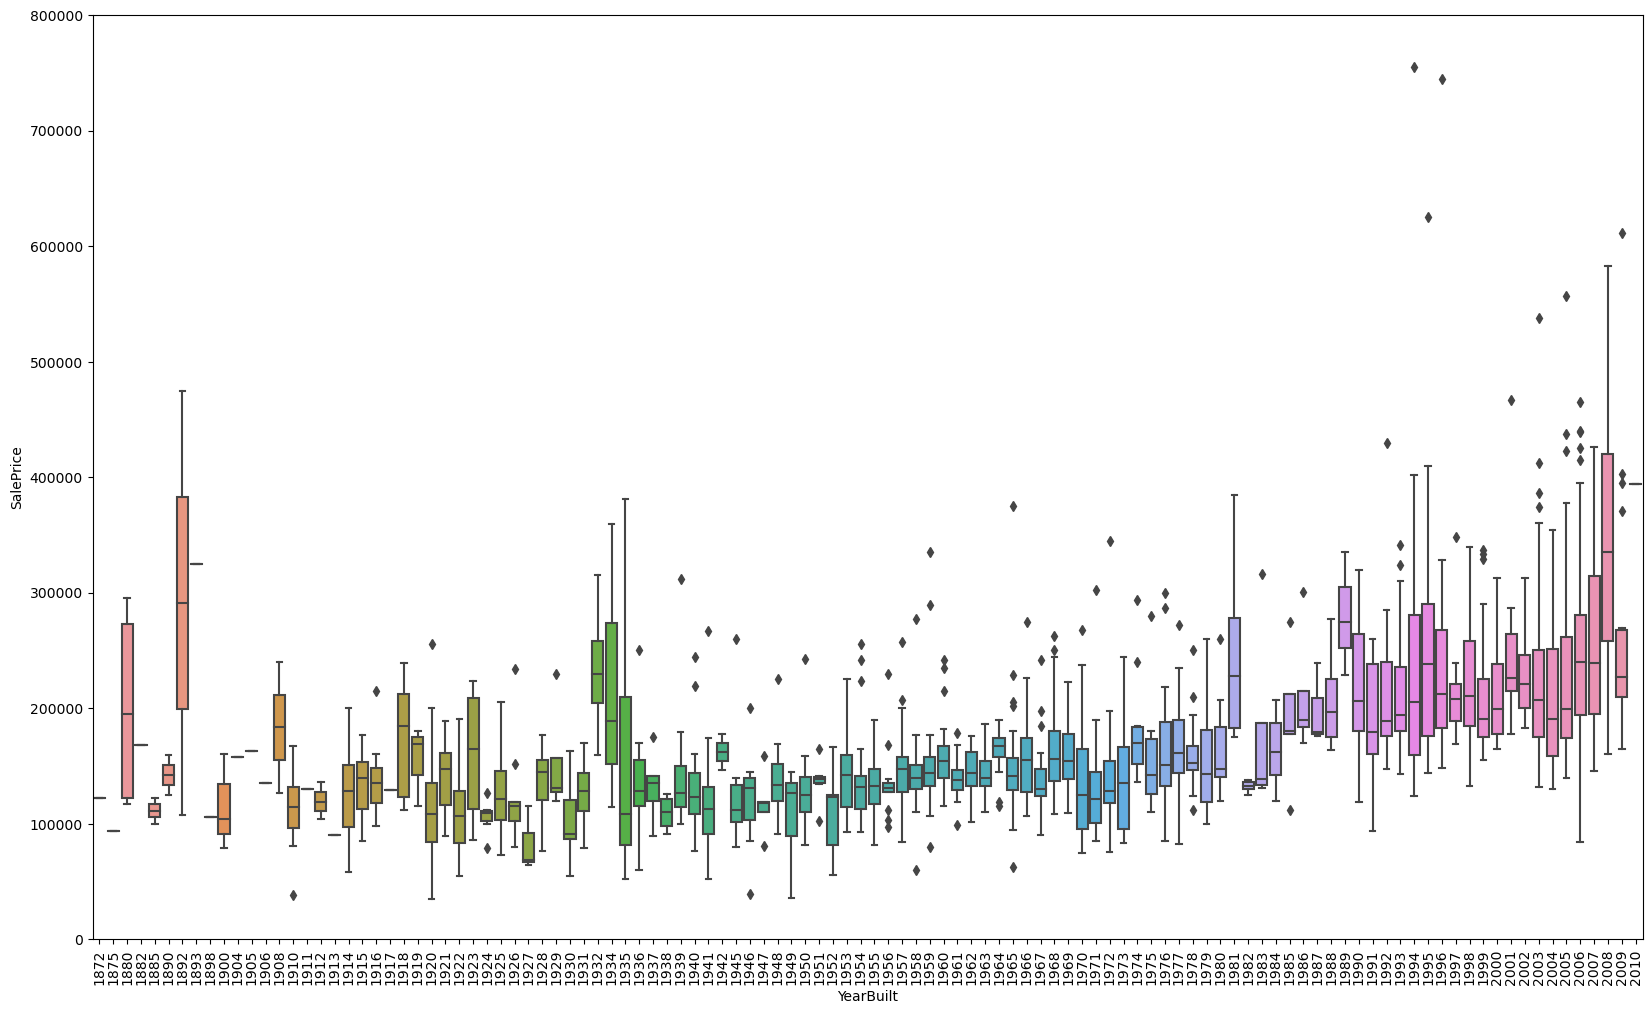

In [16]:
data6 = pd.concat([df["YearBuilt"], df["SalePrice"]], axis=1)
# Personalizar el gráfico de bigotes o boxplot
f, ax = plt.subplots(figsize = (20,12))
fig = sns.boxplot(x=data6["YearBuilt"],y=data6["SalePrice"], data=data6)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()


Eliminando outliers y graficándolo con un modelo de limpieza de quartiles

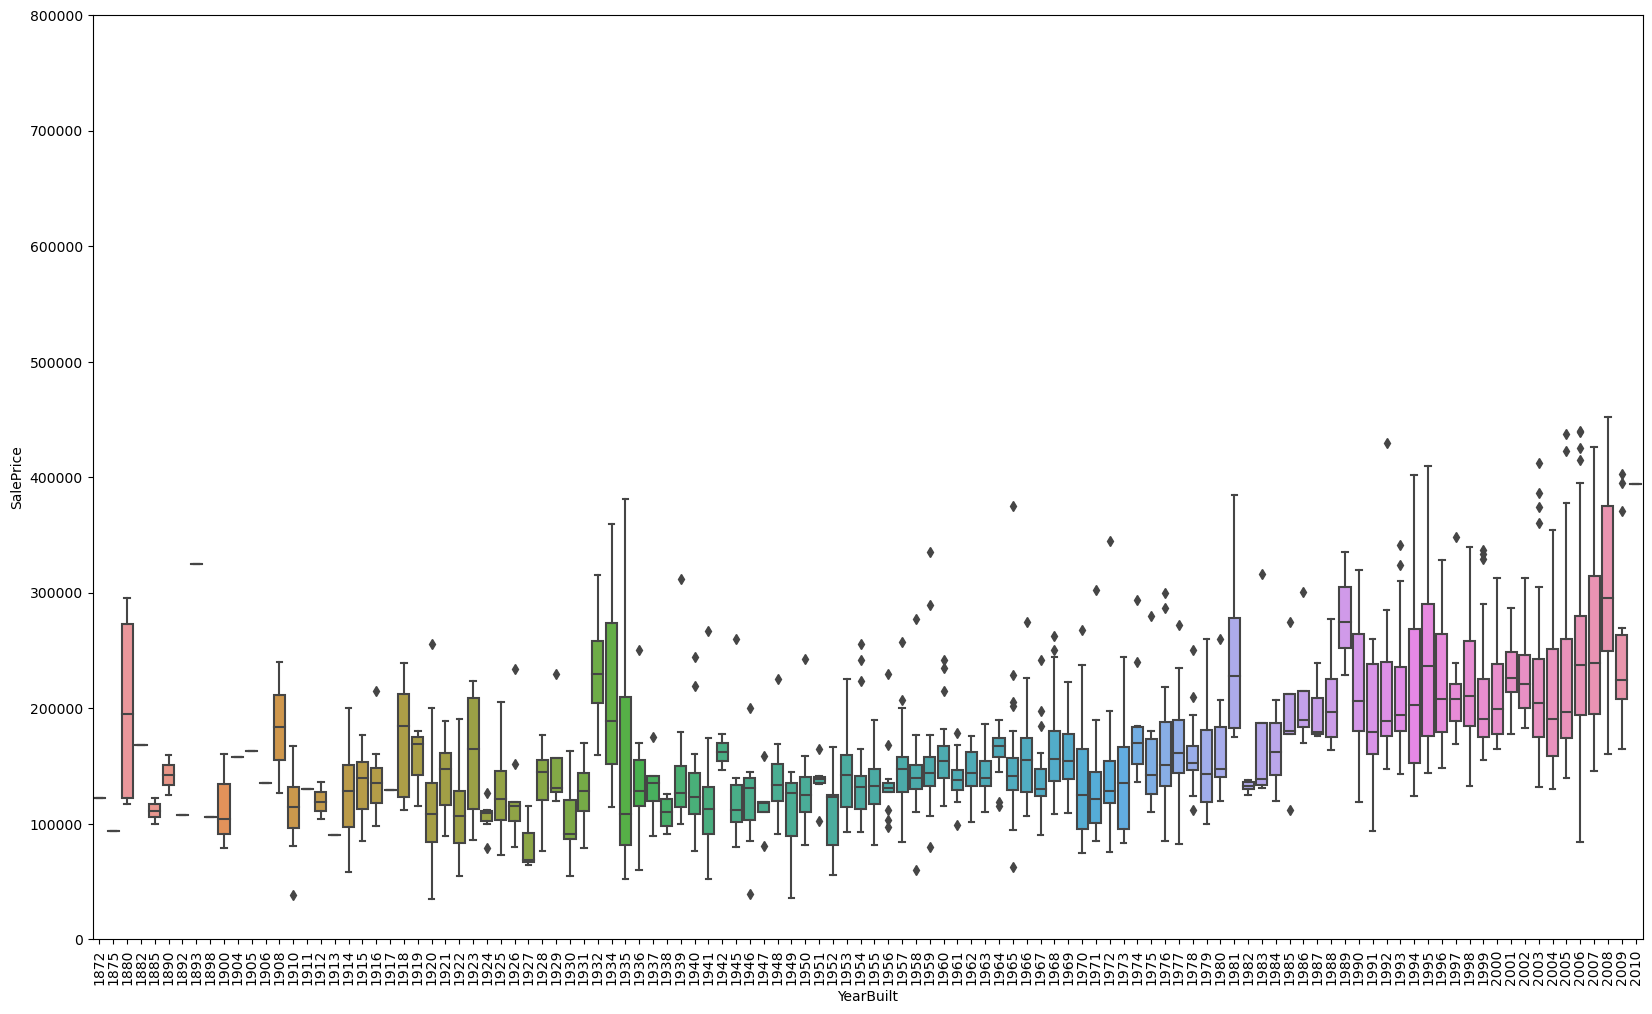

In [17]:
data6 = pd.concat([df["YearBuilt"], df["SalePrice"]], axis=1)

# Calcular los percentiles para identificar los outliers
Q1 = data6["SalePrice"].quantile(0.15)
Q3 = data6["SalePrice"].quantile(0.85)
IQR = Q3 - Q1

# Definir un umbral para considerar los valores como outliers
umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR

# Filtrar los outliers
data6_filtered = data6[(data6["SalePrice"] >= umbral_inferior) & (data6["SalePrice"] <= umbral_superior)]

# Personalizar el gráfico de velas japonesas (candlestick chart)
f, ax = plt.subplots(figsize=(20, 12))

# Usar seaborn para crear un boxplot (velas japonesas)
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data6_filtered, ax=ax)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Mapa de calor de datos

In [18]:
k = 10

<Axes: >

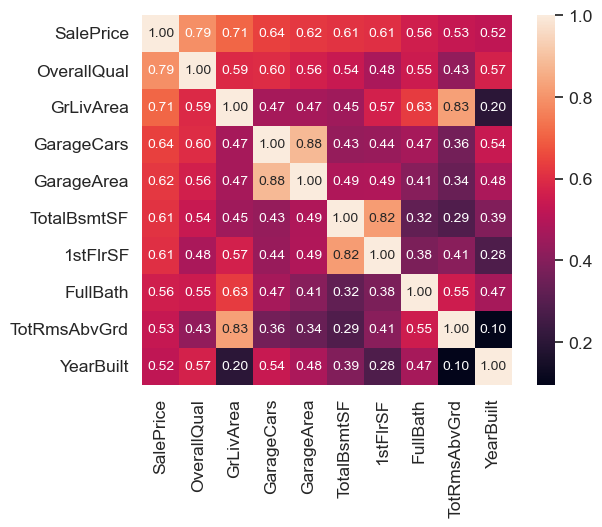

In [19]:
corr_cols = corr_matriz.nlargest(k, "SalePrice")["SalePrice"].index
corr_data = np.corrcoef(df[corr_cols].values.T)
sns.set(font_scale=1.15)
sns.heatmap(corr_data, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10,}, yticklabels=corr_cols.values, xticklabels=corr_cols.values)

Ahora, haremos un Pairplot con las columnas de mayor interés en la correlación marcada, así podremos ver como están relacionadas entre sí.

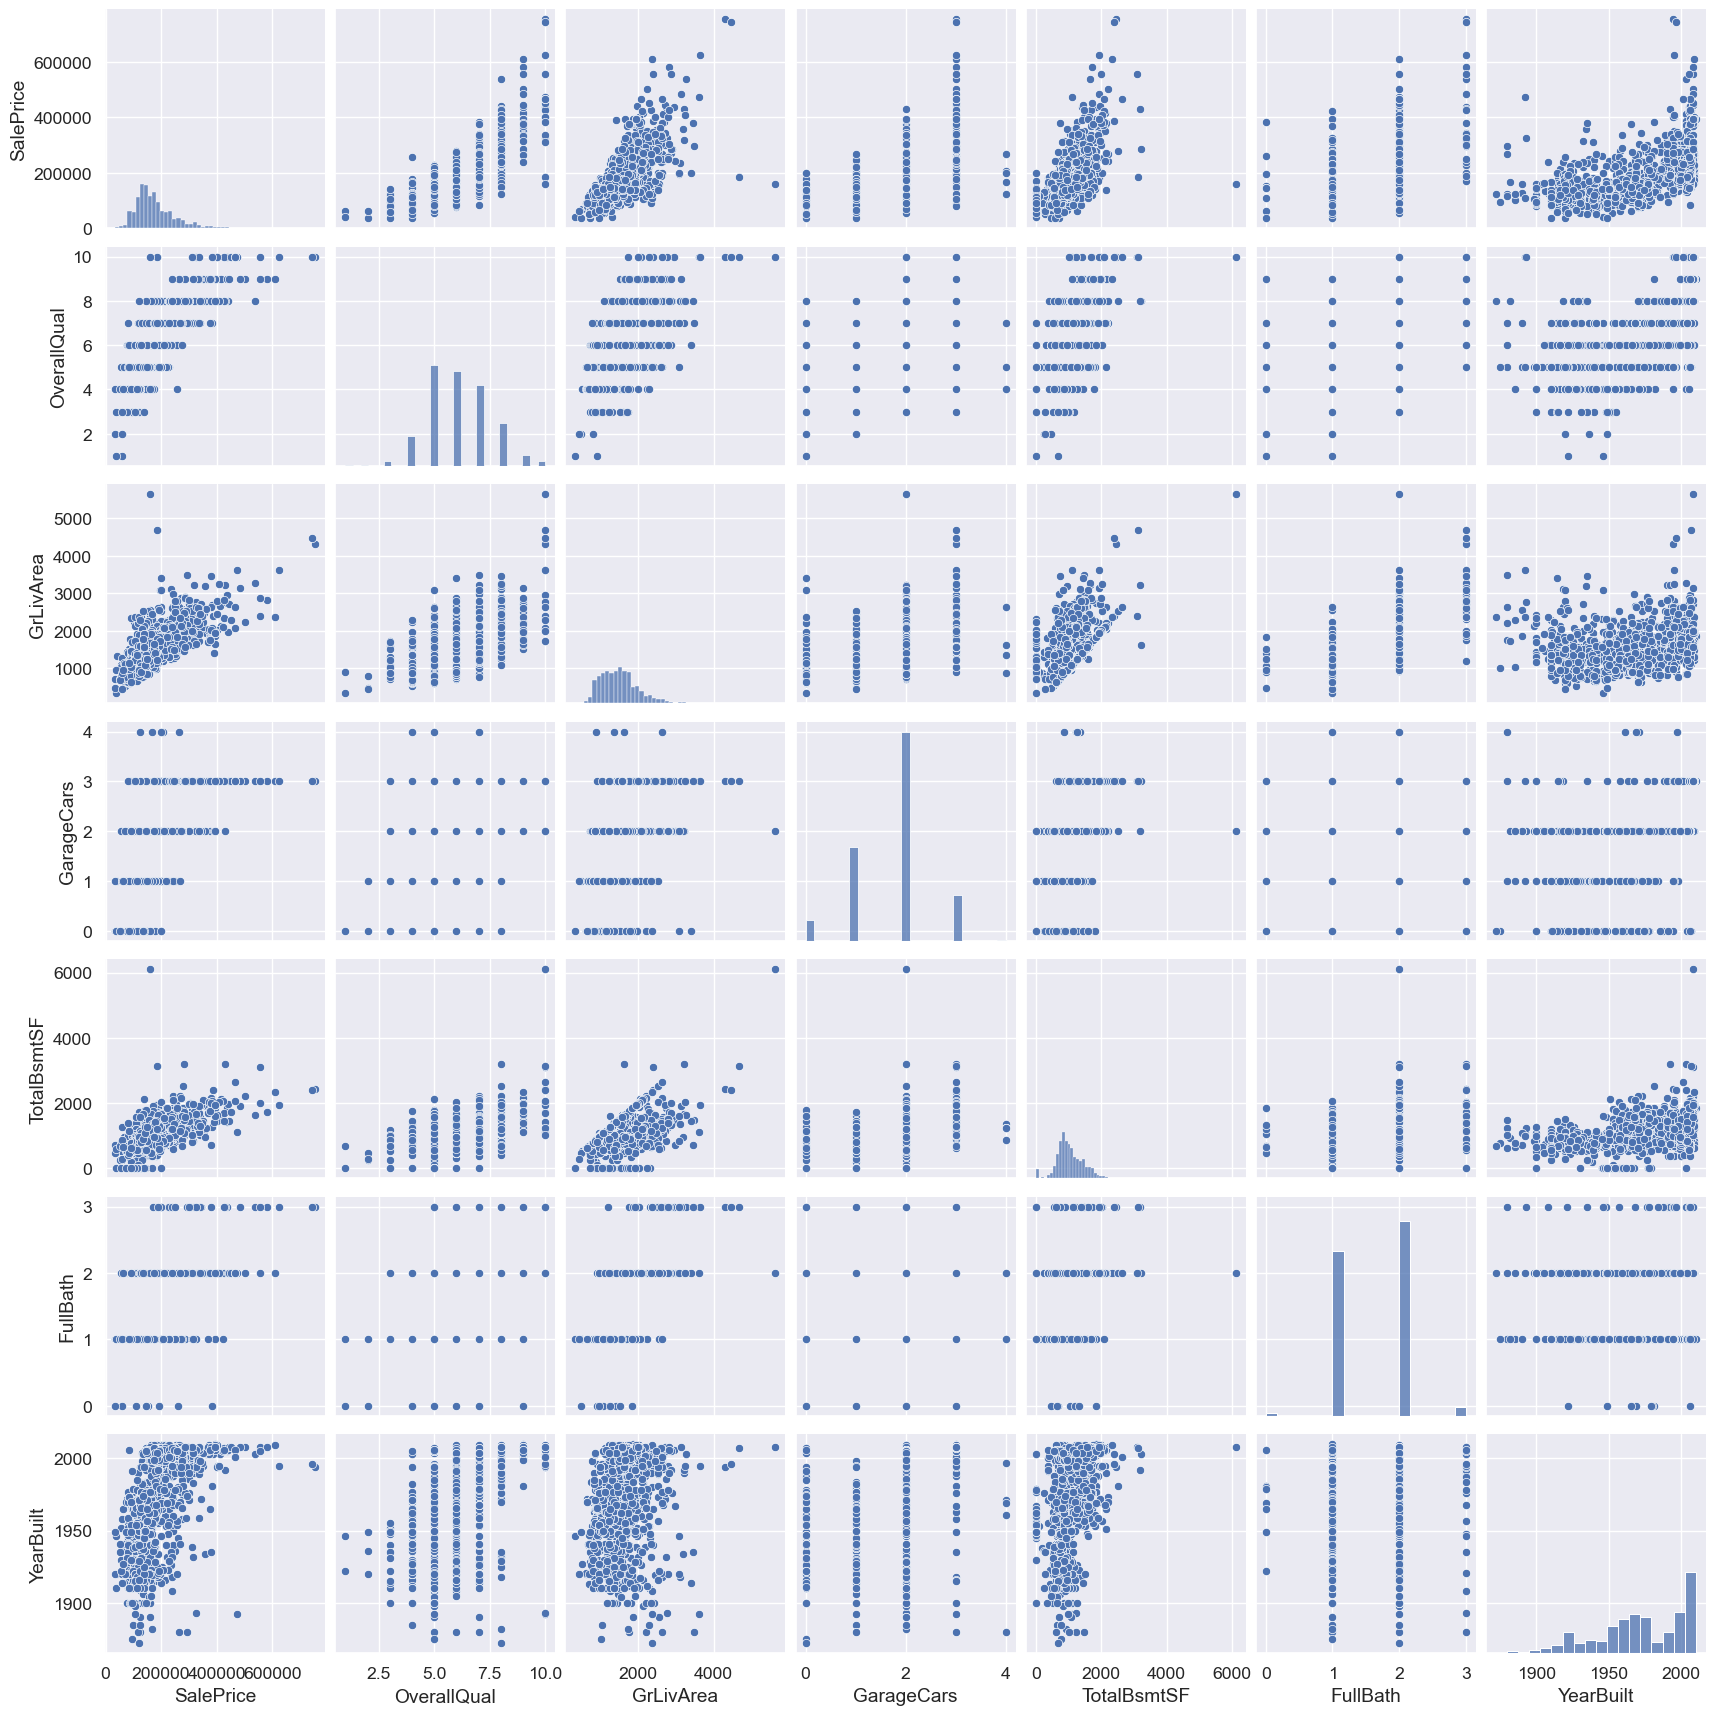

In [23]:
columns_pairplot = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(df[columns_pairplot], height=2.5)
plt.show()

### Final toughts


### About the autor:

<a href="https://www.linkedin.com/in/mario-casanova/">Mario Casanova</a> Is a Data Analyst with +4 years of experience as an Analyst and Advisor, collecting experience working with all kind of datasets, mainly in project and team management, stock market analysis, real state insights, FP&A, financial accounting, process engineering, life insurance, machine learning application and business consulting, creator of the SHILD method, which prioritizes the protection of human value and ethical wealth management.